#Importing Dependencies

In [405]:
import pandas as pd
import numpy as np
import string
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [406]:
import nltk
nltk.download('punkt')
# from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [407]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [408]:
import matplotlib.pyplot as plt
import seaborn as sns

# Text Peprocessing

##Stop Words

In [409]:
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

stop_words += ['new' , 'york', 'near', 'nyc', 'city' , 'newyork', 'ny', 'nytimes', 'state', 'time', 'today', 'tomorrow', 'like']

In [410]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'would', 'namely', 'could', 'in', 'latter', 'ourselves', 'yours', 'become', 'throughout', 'a', 'whereupon', 'other', 'move', 'down', 'whatever', 'should', 'seemed', 'when', 'had', '‘ll', 'your', 'ca', 'us', 'whether', 'whereafter', 'him', 'for', '‘d', 'at', 'themselves', 'sometimes', 'am', 'all', 'over', 'eight', 'show', 'by', 'each', 'will', 'five', 'too', 'to', 'with', 'somehow', 'rather', 'however', 'seems', 'may', 'no', 'various', 'side', 'already', 'both', 'into', 'take', 'wherever', 'becoming', 'say', 'toward', 'third', 'quite', 'anyhow', "'m", 'against', 'until', 'ten', 'hers', 'also', 'anywhere', 'give', 'still', 'whereby', 'the', 'least', 'neither', 'this', 'who', 'many', 'beside', 'therefore', 'either', "n't", 'none', 'himself', '’ve', 'we', 'must', 'across', 'done', 'some', 'besides', 'above', 'much', 'using', '‘s', 'within', 'keep', 'six', 'never', 'sixty', 'n‘t', 'my', 'few', 'perhaps', 'upon', 'back', 'full', 'not', 'mine', 'an', 're', 'can', 'have', 'just', 'from', 'eve

In [411]:
stop_words += sw_spacy

##Tokenizing

In [412]:
def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    # stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

##Removing noise

In [413]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums


##Lemmatization

In [414]:
from nltk.stem import WordNetLemmatizer


In [415]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

## Data Preprocessing

In [416]:
df = pd.read_csv('/content/bottom_anomaly_twitter_data.csv')
df2 = pd.read_csv('/content/top_anomaly_twitter_data.csv')

In [417]:
df.head()

,Unnamed: 0,text,date,Tweet Id
0,0,If you live near New York's La Guardia Airport...,2015-10-04 23:54:01+00:00,650821202676719616
1,1,.@Space_Station Hello #ISS from New York City ...,2015-10-04 23:27:07+00:00,650814435032875008
2,2,@myitalianangels @joshcometomexic @joshgroban ...,2015-10-04 23:04:48+00:00,650808820478930944
3,3,"really ⁉.. from 2014⏬\n\n""Half Of New York Cit...",2015-10-04 22:58:17+00:00,650807179230998528
4,4,@JazzyBonesJones by train yeah. I live in NYS ...,2015-10-04 21:28:19+00:00,650784536855474176


In [418]:
#Remove urls from text

df['text'] = df['text'].str.replace(r"http\S+", "")
df2['text'] = df2['text'].str.replace(r"http\S+", "")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [419]:
# TOKENIZE TEXT

df['text'] = df['text'].apply(tokenize_lowercase)
df2['text'] = df2['text'].apply(tokenize_lowercase)

In [420]:
#removing numbers from dfs

df['text'] = df['text'].apply(remove_nums)
df2['text'] = df2['text'].apply(remove_nums)


In [421]:
# Lemmatize text

df['text'] = df['text'].apply(lemmatize_text)
df2['text'] = df2['text'].apply(lemmatize_text)

#EDA

In [422]:
df.head()

,Unnamed: 0,text,date,Tweet Id
0,0,"[live, la, guardia, airport, talk]",2015-10-04 23:54:01+00:00,650821202676719616
1,1,"[hello, i, central, park, mi, away, issabove]",2015-10-04 23:27:07+00:00,650814435032875008
2,2,"[myitalianangels, joshcometomexic, joshgroban,...",2015-10-04 23:04:48+00:00,650808820478930944
3,3,"[half, living, poverty, cc, michaeljaco]",2015-10-04 22:58:17+00:00,650807179230998528
4,4,"[jazzybonesjones, train, yeah, live, ny, live,...",2015-10-04 21:28:19+00:00,650784536855474176


In [423]:
df2.head()

,Unnamed: 0,text,date,Tweet Id
0,0,"[taylorklainer, lucky, omg, lived, totally, li...",2015-07-20 23:32:47+00:00,623274383952351232
1,1,"[love, glimpse, lt, background, wing, skyline]",2015-07-20 22:57:53+00:00,623265602048774144
2,2,"[mac, window, system, admin, job, active, dire...",2015-07-20 21:37:11+00:00,623245289973940224
3,3,"[cloudsteph, candlewood, suite, time, square, ...",2015-07-20 21:31:31+00:00,623243867555516421
4,4,"[hour, close, come, hang, babysallright, party]",2015-07-20 21:22:34+00:00,623241614350127104


In [424]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Bottom Anomaly words is {}'.format(max(tweet_lengths)))
print('Max tweet length in Bottom anomaly words is {}'.format(min(tweet_lengths)))

43736 words total, with a vocabulary size of 12480
Max tweet length in Bottom Anomaly words is 62
Max tweet length in Bottom anomaly words is 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


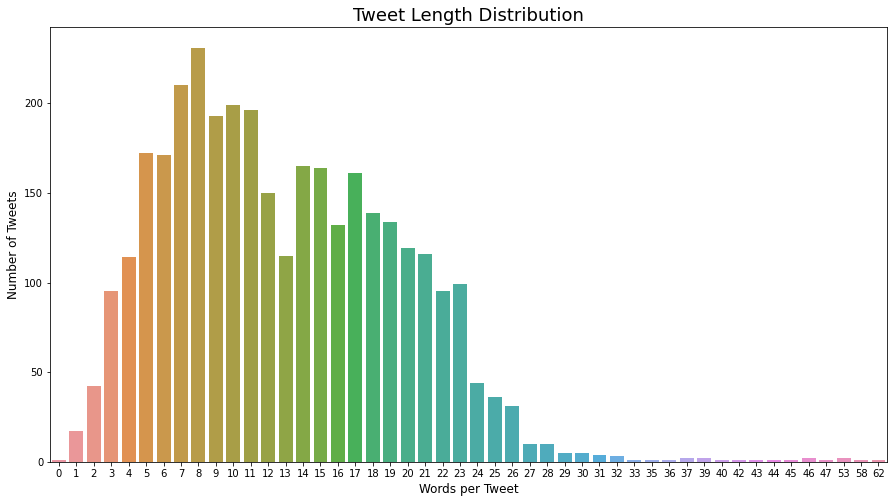

In [425]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [426]:
all_words = [word for tokens in df2['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df2['text']]
vocab = sorted(list(set(all_words)))


print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Top anomaly words is {}'.format(max(tweet_lengths)))
print('Min tweet length in Top anomaly words is {}'.format(min(tweet_lengths)))

58690 words total, with a vocabulary size of 14360
Max tweet length in Top anomaly words is 50
Min tweet length in Top anomaly words is 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


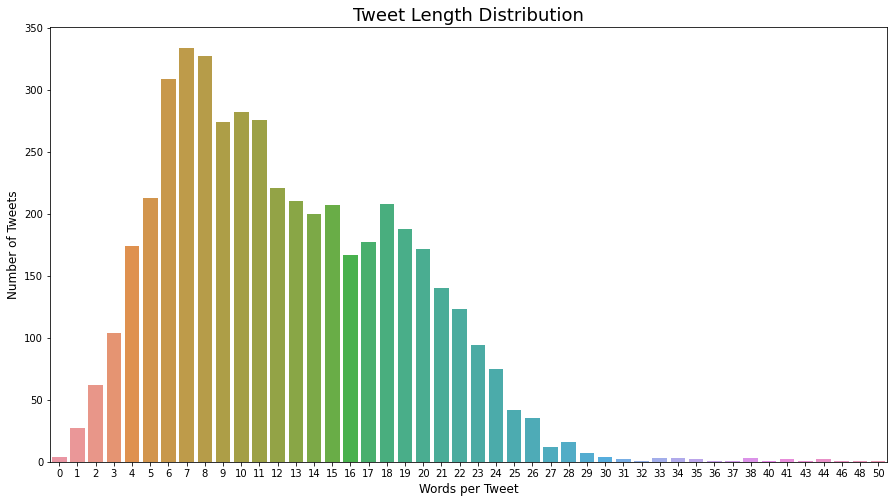

In [427]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

##WordCloud

In [428]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(50)

[('time', 273),
 ('people', 254),
 ('live', 244),
 ('amp', 243),
 ('death', 157),
 ('know', 145),
 ('day', 142),
 ('year', 123),
 ('want', 114),
 ('trump', 112),
 ('end', 109),
 ('good', 109),
 ('life', 107),
 ('train', 106),
 ('right', 103),
 ('future', 103),
 ('park', 101),
 ('need', 99),
 ('damn', 98),
 ('think', 97),
 ('street', 94),
 ('place', 91),
 ('look', 90),
 ('coming', 88),
 ('love', 88),
 ('got', 88),
 ('find', 87),
 ('going', 85),
 ('come', 84),
 ('square', 83),
 ('said', 81),
 ('news', 80),
 ('coronavirus', 79),
 ('week', 76),
 ('case', 75),
 ('man', 74),
 ('found', 73),
 ('home', 72),
 ('police', 71),
 ('number', 69),
 ('shooting', 67),
 ('friend', 67),
 ('house', 66),
 ('manhattan', 65),
 ('great', 65),
 ('island', 65),
 ('way', 64),
 ('east', 64),
 ('border', 64),
 ('seen', 63)]

In [429]:
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

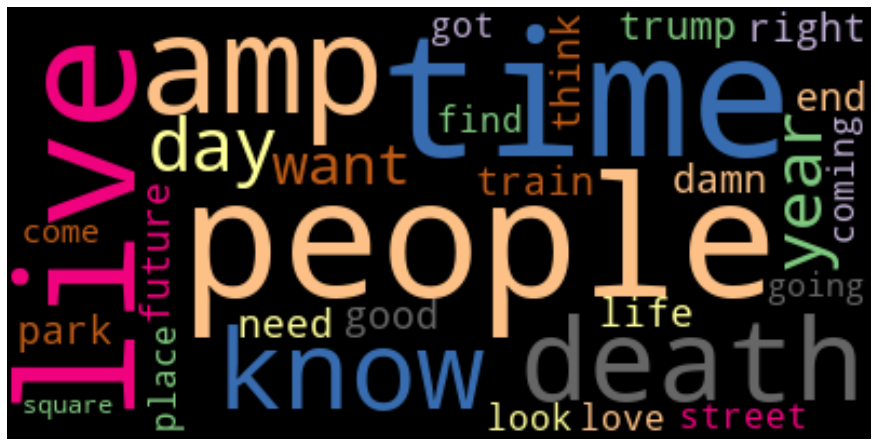

In [430]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

#Bag of Words

In [431]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df.text)

#view integer mappings
text_dict.token2id

{'airport': 0,
 'guardia': 1,
 'la': 2,
 'live': 3,
 'talk': 4,
 'away': 5,
 'central': 6,
 'hello': 7,
 'i': 8,
 'issabove': 9,
 'mi': 10,
 'park': 11,
 'angeles': 12,
 'joshcometomexic': 13,
 'joshgroban': 14,
 'margaritha': 15,
 'myitalianangels': 16,
 'usa': 17,
 'cc': 18,
 'half': 19,
 'living': 20,
 'michaeljaco': 21,
 'poverty': 22,
 'as': 23,
 'big': 24,
 'canada': 25,
 'jazzybonesjones': 26,
 'lol': 27,
 'ny': 28,
 'train': 29,
 'yeah': 30,
 'bycherylcosta': 31,
 'circular': 32,
 'ethan': 33,
 'gray': 34,
 'motorist': 35,
 'report': 36,
 'ufo': 37,
 'watertown': 38,
 'amp': 39,
 'came': 40,
 'confirms': 41,
 'convenient': 42,
 'dead': 43,
 'fled': 44,
 'impd': 45,
 'man': 46,
 'pm': 47,
 'rural': 48,
 'shot': 49,
 'store': 50,
 'street': 51,
 'suspect': 52,
 'bc': 53,
 'christmas': 54,
 'fairytale': 55,
 'im': 56,
 'listening': 57,
 'mum': 58,
 'screaming': 59,
 'turn': 60,
 'apartment': 61,
 'manhattan': 62,
 'mark': 63,
 'price': 64,
 'time': 65,
 'airbnb': 66,
 'battery': 6

In [432]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [433]:
tweets_bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(3, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)],
 [(36, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(36, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(11, 1), (51, 1), (61, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(6, 1), (11, 1), (62, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(75, 1), (76, 1), (77, 1)],
 [(78, 1), (79, 1), (80, 1), (81, 1), (82, 1)],
 [(83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)],
 [(89, 

In [434]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.005*"people" + 0.005*"country" + 0.004*"border" + 0.004*"love" + 0.004*"place" + 0.003*"time" + 0.003*"close" + 0.003*"live" + 0.003*"number" + 0.003*"going"'),
 (1,
  '0.006*"death" + 0.005*"day" + 0.004*"good" + 0.004*"live" + 0.004*"degree" + 0.004*"case" + 0.004*"news" + 0.004*"time" + 0.004*"central" + 0.003*"right"'),
 (2,
  '0.012*"time" + 0.009*"people" + 0.007*"death" + 0.007*"amp" + 0.005*"page" + 0.005*"square" + 0.005*"police" + 0.005*"end" + 0.004*"shooting" + 0.004*"loss"'),
 (3,
  '0.008*"train" + 0.007*"amp" + 0.005*"people" + 0.005*"trump" + 0.004*"dog" + 0.004*"lost" + 0.003*"derails" + 0.003*"want" + 0.003*"live" + 0.003*"east"'),
 (4,
  '0.009*"live" + 0.005*"amp" + 0.005*"year" + 0.004*"life" + 0.004*"time" + 0.004*"dead" + 0.004*"people" + 0.003*"think" + 0.003*"future" + 0.003*"know"')]

In [436]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 25.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=257921207cc5791e0dea363a29cf629426657c18c76ffc3e2eb642c2e36d5180
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [439]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.020126  0.126524       1        1  22.647848
1     -0.010923  0.063749       2        1  20.533133
2     -0.120857 -0.123507       3        1  20.294462
4     -0.011230  0.004543       4        1  18.946690
3      0.163136 -0.071308       5        1  17.577868, topic_info=           Term        Freq       Total Category  logprob  loglift
29        train   66.000000   66.000000  Default  30.0000  30.0000
164       death  145.000000  145.000000  Default  29.0000  29.0000
2256       page   50.000000   50.000000  Default  28.0000  28.0000
309     country   52.000000   52.000000  Default  27.0000  27.0000
1429       loss   36.000000   36.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
962        year   16.828139  105.539624   Topic5  -6.1243  -0.0975
62    manhattan   14.559548   49.276079   Topic5  -6.2692   0.5193
780      future   15.764883   83.887537   Topic5  -6.1896   0.0668
330        news   14.495491   57.737651   Topic5  -6.2736   0.3565
370       found   14.348878   56.201966   Topic5  -6.2837   0.3732

[363 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
12340      5  0.983119  aberdeen
4432       3  0.898243  aircraft
0          1  0.182265   airport
0          2  0.676985   airport
0          3  0.078114   airport
...      ...       ...       ...
962        2  0.198977      year
962        3  0.047376      year
962        4  0.379005      year
962        5  0.161077      year
3554       3  0.954786   yorkers

[661 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4])

In [440]:
pyLDAvis.save_html(vis, 'lda.html')